In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 22,15
rcParams['xtick.labelsize'] = 54
rcParams['ytick.labelsize'] = 54
import numpy as np
import os 
my_path = os.path.abspath('/Users/juan/Desktop/Git/3level/DATA/PAPER_DATA')
my_path1 = os.path.abspath('/Users/juan/Desktop/3level_img/')


In [3]:
class variables():
    def __init__(self):
         #eigen energies
        self.w10 = 20
        self.w2w1 = 1.6
        self.w20 = self.w10*self.w2w1
       
        #carnot efficiency
        self.n_c  =np.arange(1e-6,1,0.02)
        #temperatures
        self.b_l  = 1/np.array([250,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
       #energy variables
        self.l = np.linspace(0,np.sqrt(self.w20*self.w10),80)
        self.e_20 = ((self.w20+self.w10)/2 + np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2  ))
        self.e_10 = ((self.w20+self.w10)/2 - np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2  ))
       #lindblad constants
        self.g_l10  = 100
        self.g_h10 =  self.g_l10
        self.g_h20  = self.g_l10*5
        self.g_l20 = self.g_h20
       
        #cosine data
        self.c    = (self.w20 -self.w10 )/(2*np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2))
        #power variables
    def g1(self):
        return 1/2*(self.g_l10*(1+self.c) + self.g_h10*(1-self.c))
    def g2(self):
        return 1/2*(self.g_l20*(1-self.c) + self.g_h20*(1+self.c)) 
    def g1m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l10*(1+self.c)*np.exp(-self.b_l*self.e_10)\
                        + self.g_h10*(1-self.c)*np.exp(-self.b_h[value]*self.e_10)))
        return result
    def g2m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l20*(1-self.c)*np.exp(-self.b_l*self.e_20) \
                        + self.g_h20*(1+self.c)*np.exp(-self.b_h[value]*self.e_20)))
        return result

    def omega(self):
        return ((self.e_20-self.e_10)**2 + ( (self.g1()+self.g2())/2)**2)\
                /(self.w20-self.w10)

    def G(self):
        return  1/2*(self.g1()+self.g2())*(1 + (1/(self.e_20-self.e_10)**2)\
                *(1/2*(self.g1()+self.g2()))**2)
    
    def q1(self):
        return (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    
    def q2(self):
        return (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
         
 #Initialize the object var       

var = variables()

a =var.g2m()/var.g2()- var.g1m()/var.g1()



In [4]:
       
 def POWER(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( (1/2*(e_20-e_10)*(1-c**2)*omega\
                      *( (g2m[value]/g2) - (g1m[value]/g1)))\
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result





In [5]:
# <0|rho|0>
def R00(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( ( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) +\
                ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) ) \
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result



    

In [6]:
def P0(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    b_h    = var.b_h
    b_l    = var.b_l
    result = []
    for value in range(len(var.b_h)):
        result.append( e_10*g_h10*G_l10*((1-c)/2)*(np.exp(-b_h[value]*e_10)-np.exp(-b_l*e_10))
                      +e_20*g_h20*G_l20*((1+c)/2)*(np.exp(-b_h[value]*e_20)-np.exp(-b_l*e_20) ))
    return result

    

In [7]:
def Ql(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    q1     =  var.q1()
    q2     =  var.q2()
    
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    #return ( (e_20/(e_20 -e_10))*G_l20 -(e_10/(e_20 -e_10))*G_l10 )*p -qd
    return  (( e_20/(e_20 -e_10))*q2 -(e_10/(e_20 -e_10))*(1-q1) )*p -qd
def Qh(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    q1     =  var.q1()
    q2     =  var.q2()
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    #return ( (e_20/(e_20 -e_10))*G_h20 -(e_10/(e_20 -e_10))*G_h10 )*p +qd
    return  (( e_20/(e_20 -e_10))*(1-q2) -(e_10/(e_20 -e_10))*q1 )*p +qd
# efficiency
def EFF(p,q):
    return p/q

# entropy production
def sigma(var,q1,q2):
    qc = np.transpose(q1)
    qh = np.transpose(q2)
    
    return -(var.b_h*qh +var.b_l*qc)

# local coupling efficiency
def n_q(var):
    e_20 = var.e_20
    e_10 = var.e_10
    q1 = var.q1()
    q2 = var.q2()
    return (1- e_10/e_20)/(1- q2 -(e_10/e_20)*q1 )



    

<ipython-input-7-a3ba11497cfe>:36: RuntimeWarning: invalid value encountered in true_divide
  return p/q


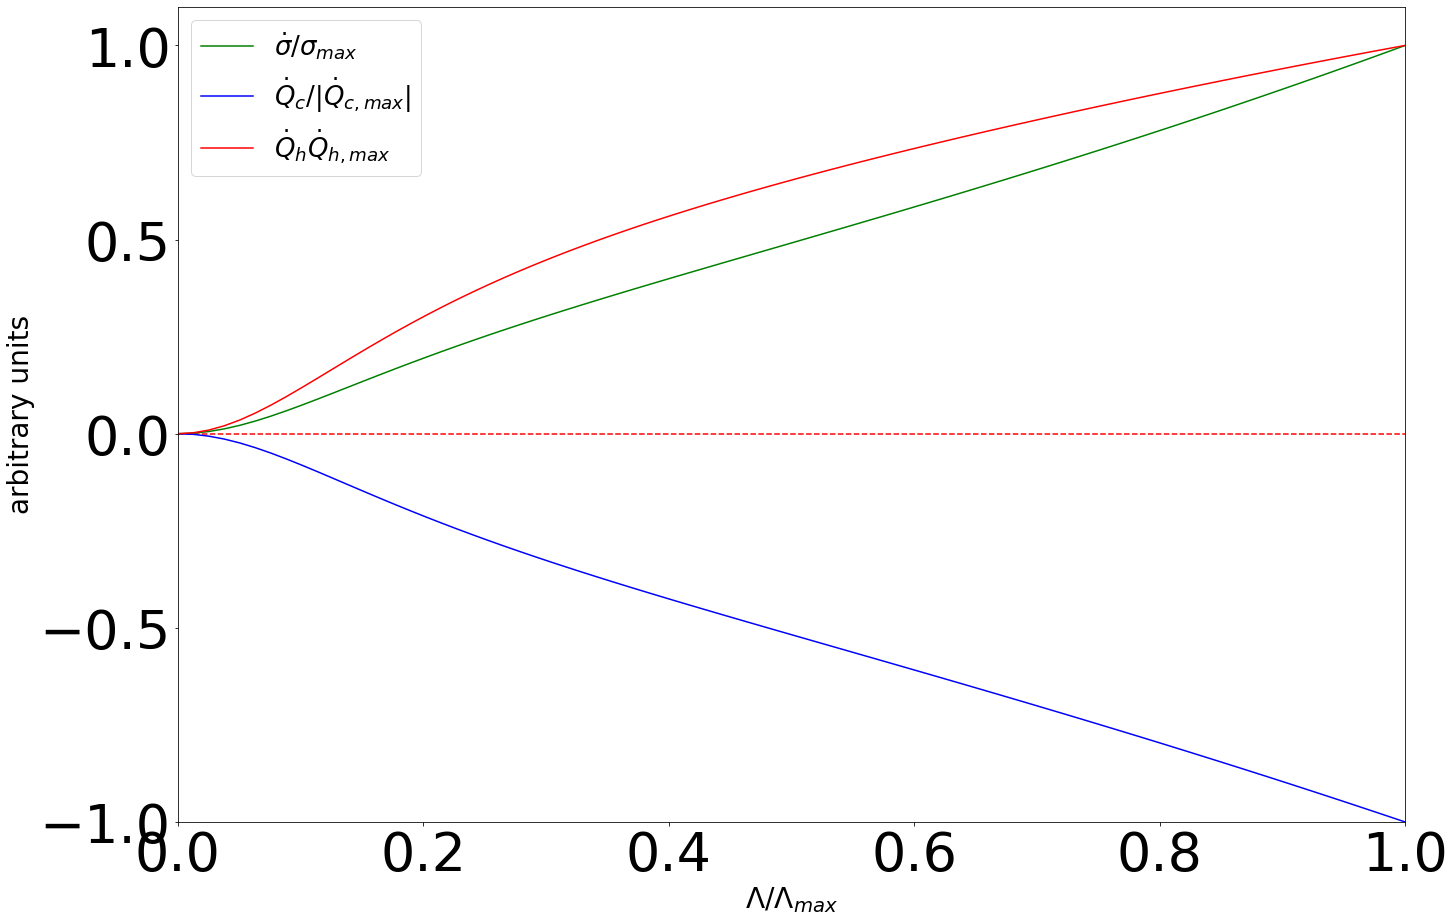

In [9]:
# ENTROPY PRODUCTION
i =39 
var.g_h10 =  var.g_l10*(1)
var.g_l20 = var.g_h20*(1)
x = var.l/max(var.l)
P   = POWER(var)
R   = np.array(R00(var))
P_0 = np.array(P0(var))
Q_d = R*P_0
Q_l = Ql(var,P,Q_d)
Q_h = Qh(var,P,Q_d)
n   = EFF(P,Q_h)
ent_p = np.transpose(sigma(var,Q_l,Q_h))
idx = np.argwhere(np.diff( np.sign( -Q_h[i]+Q_l[i] ))).flatten()
#plt.plot(x[idx[1:]+1],ent_p[i][idx[1:]], 'o' )

plt.plot(x,ent_p[i]/max(ent_p[i]),label=r'$\dot\sigma/\sigma_{max}$',color='green')
plt.plot(x,Q_l[i]/max(abs(Q_l[i])),label=r'$\dotQ_c/ |\dotQ_{c,max}| $',color='blue')
plt.plot(x,Q_h[i]/max(Q_h[i]),label=r'$\dotQ_h\dotQ_{h,max}$',color='red')
plt.ylim(-1,1.1)
plt.xlim(0,1)
plt.xlabel(r'$\Lambda/\Lambda_{max}$', fontsize =28)
plt.ylabel('arbitrary units',fontsize=28)
plt.hlines(0,0,1, color='r', linestyle='--')
#plt.vlines(x[idx[1]+1],-1,1.1, color='b', linestyle='--')
plt.legend(fontsize=26)
#plt.savefig(os.path.join(my_path1,'3level_entropy_uniform.eps'))


# Data collection

<ipython-input-178-500ae61d95ec>:35: RuntimeWarning: invalid value encountered in true_divide
  return p/q
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


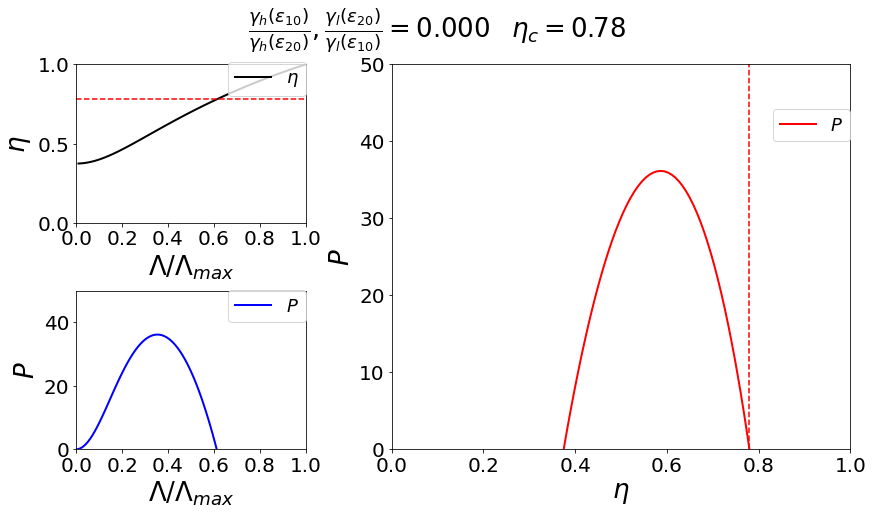

In [239]:
fig  = plt.figure(constrained_layout=True)
widths = [2, 4]
heights = [6, 6]
specs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                          height_ratios=heights)


ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[:,1])
plt.style.use('seaborn-pastel')

        
ax1.set_xlabel(r'$\Lambda/\Lambda_{max}$', fontsize =26)
ax1.set_ylabel(r'$\eta$',fontsize =26)
line1, = ax1.plot([],[],color='black',lw=2)
ax1.axhline(y=1-var.b_h[39]/var.b_l, color='r', linestyle='--')
ax1.set_xlim(0,1)
ax1.set_ylim(-0,1)
ax1.set_xticks([0,0.2,0.4,0.6,0.8,1])

    
        
ax2.set_xlabel(r'$\Lambda/\Lambda_{max}$',fontsize =26)
ax2.set_ylabel(r'$P$',fontsize =26)
line2, = ax2.plot([],[],color='blue',lw=2)
#ax1.set_aspect('equal', 'datalim')
ax2.set_xlim(0,1)
ax2.set_ylim(-0,50)
ax2.set_xticks(np.arange(0,1,0.2))
#ax2.set_title(r'$\eta_c=%.2f$'%(1-var.b_h[39]/var.b_l))
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])

ax3.set_xlabel(r'$\eta$',fontsize =26)
ax3.set_ylabel(r'$P$',fontsize =26)
line3, = ax3.plot([],[],color='red',lw=2)
ax3.set_xlim(0,1)
ax3.set_ylim(-0,50)
ax3.set_xticks(np.arange(0,1,0.2))
ax3.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax3.axvline(x=1-var.b_h[39]/var.b_l, color='r', linestyle='--')


def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    
    return line1,


i = 0
x = var.lw/max(var.lw)
var.g_h10 =  var.g_l10*(i/100)
var.g_l20 = var.g_h20*(i/100)
P   = POWER(var)
R   = np.array(R00(var))
P_0 = np.array(P0(var))
Q_d = R*P_0
Q_l = Ql(var,P,Q_d)
Q_h = Qh(var,P,Q_d)
n   = EFF(P,Q_h)


fig.suptitle(\
r'$\frac{\gamma_h(\epsilon_{10})}{\gamma_h(\epsilon_{20})},\frac{\gamma_l(\epsilon_{20})}{\gamma_l(\epsilon_{10})}=%.3f$'\
             %(i/100)\
               + r'$ \;\;\; \eta_c=%.2f$'%(1-var.b_h[39]/var.b_l), fontsize= 26)
   
line1.set_data(x,y1)
line1.set_label(r'$\eta$')
line2.set_data(x,y2)
line2.set_label(r'$P$')
line3.set_data(y1,y2)
line3.set_label(r'$P$')
ax1.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=18)
ax2.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=18)
ax3.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=18)


#plt.tight_layout(pad= .1,h_pad= .00200,w_pad=.00)
plt.savefig(os.path.join(my_path1,'3level_local.eps'))


<ipython-input-7-a3ba11497cfe>:36: RuntimeWarning: invalid value encountered in true_divide
  return p/q
<ipython-input-8-f30fdaa8fe8f>:123: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout( rect=[0, 0, 1.6, 1.6])


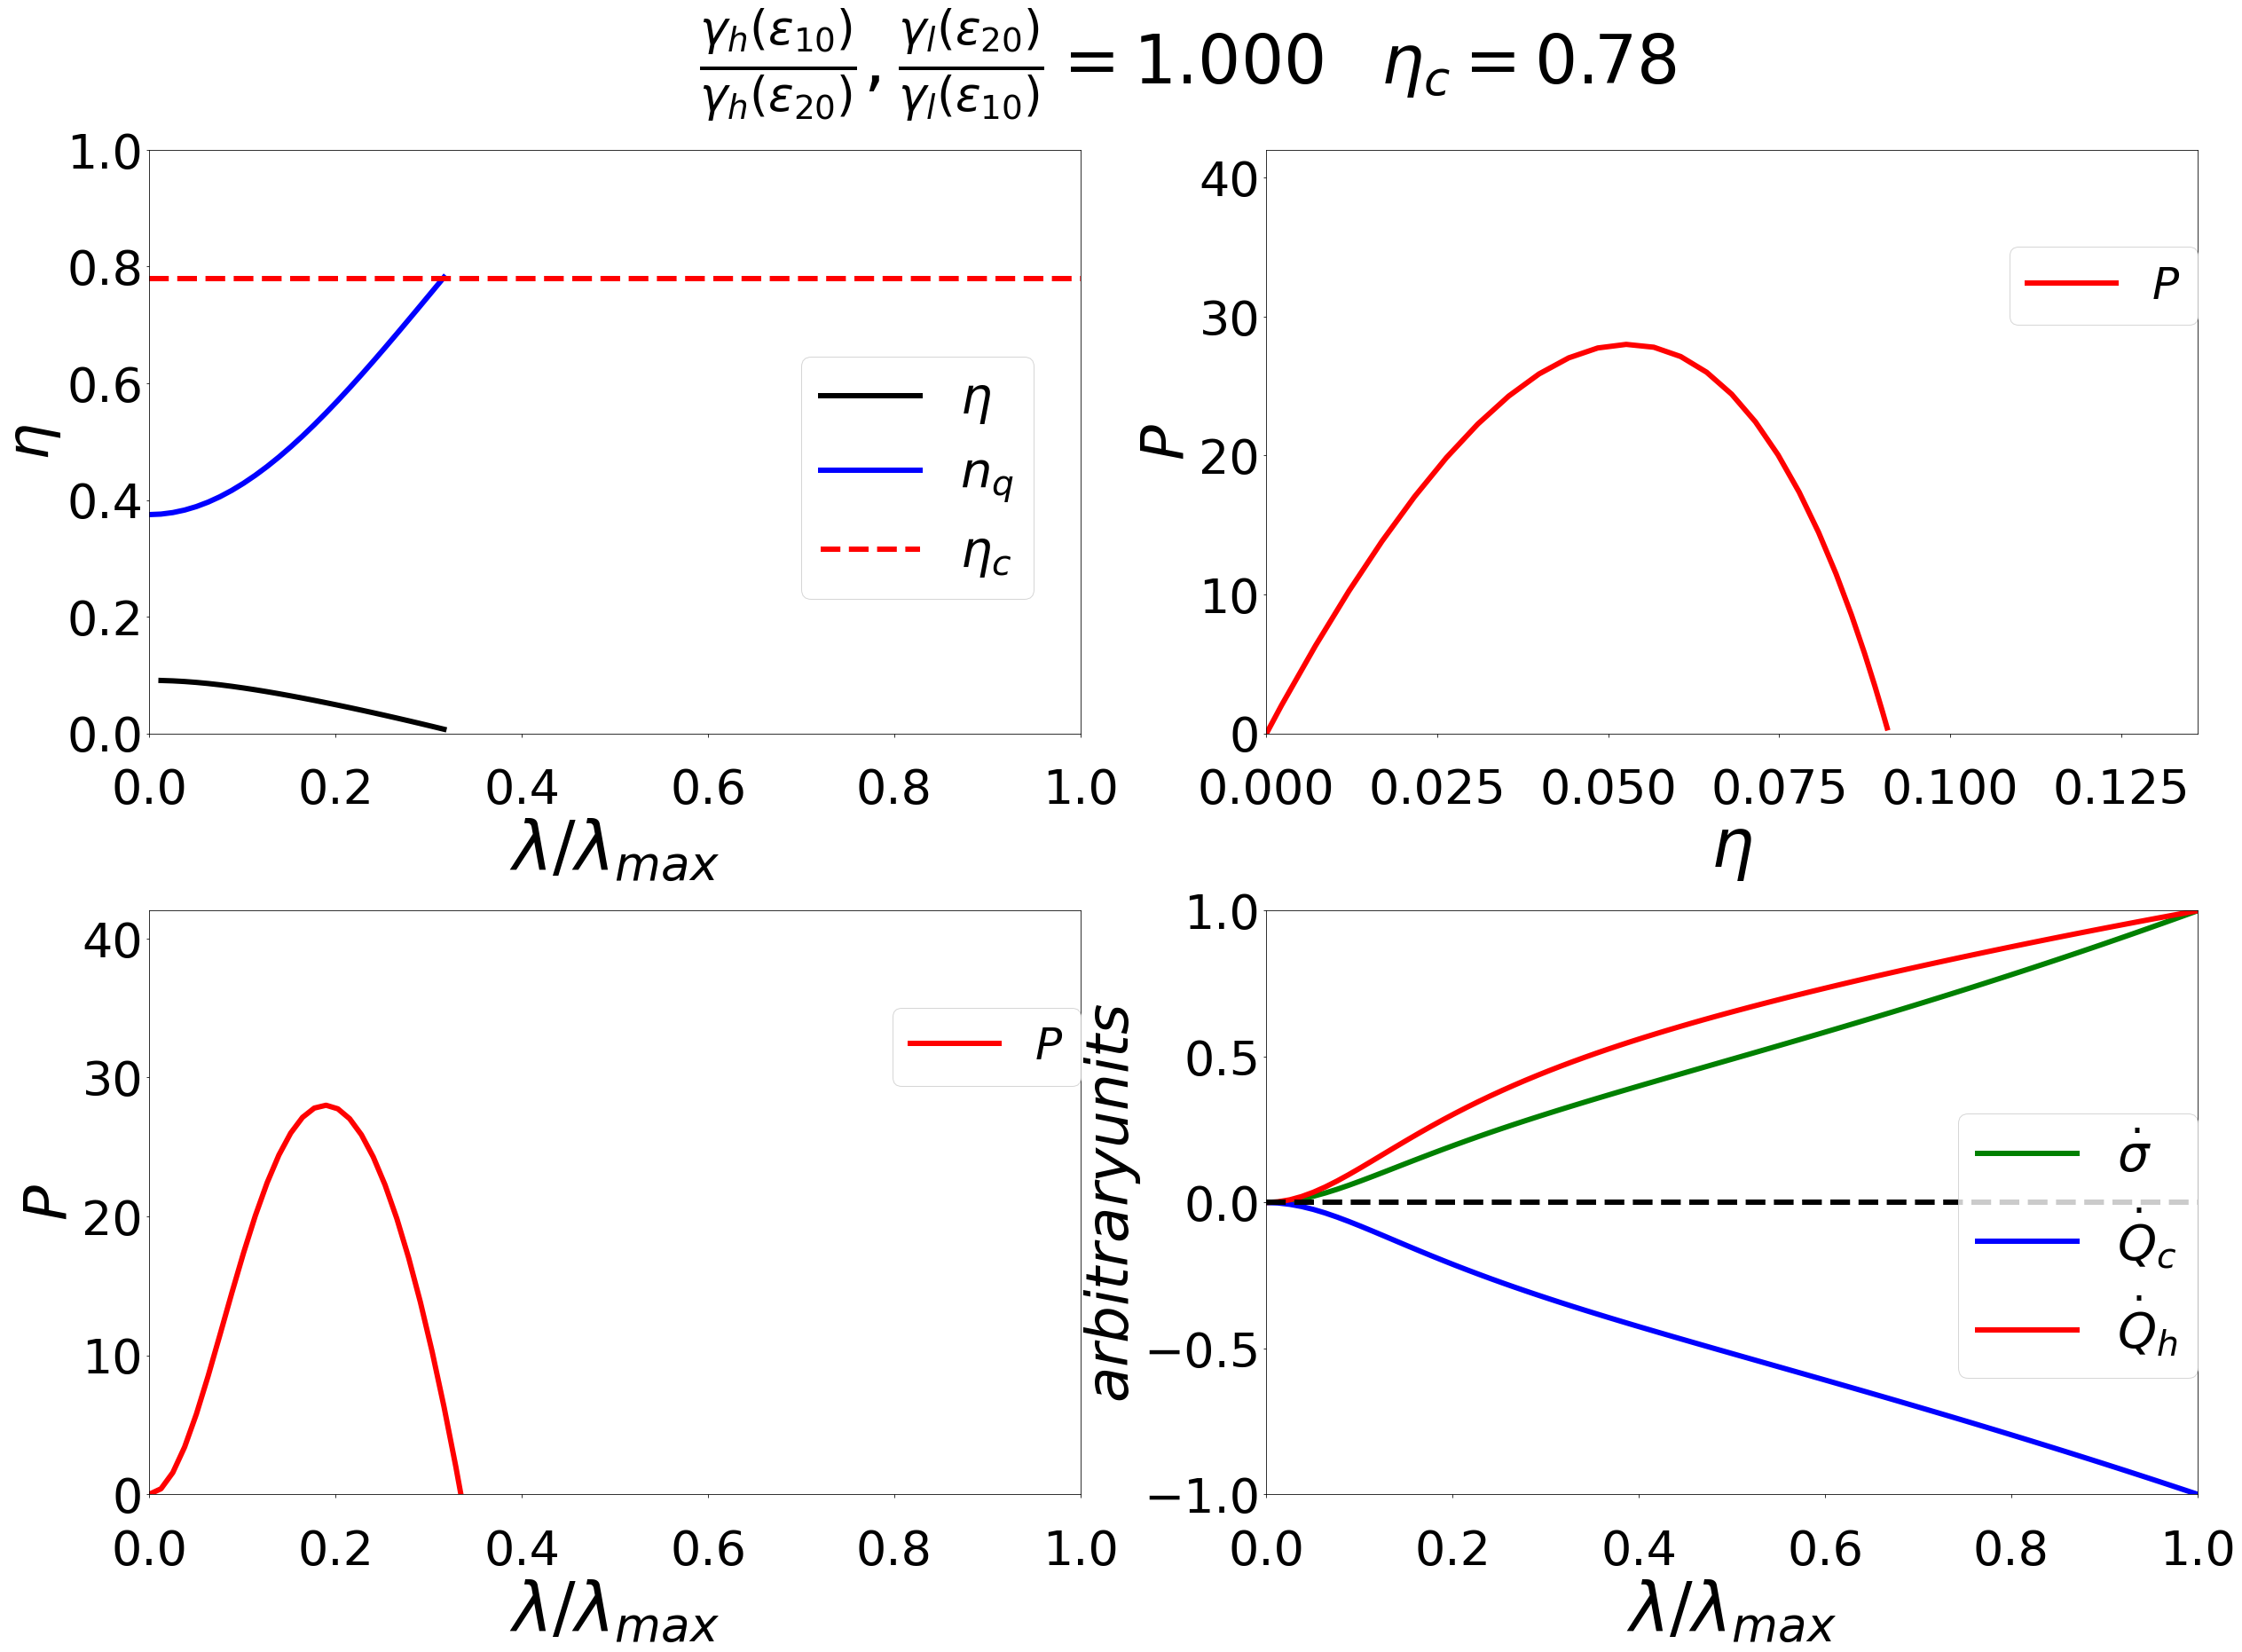

In [8]:
# Compact version
fig  = plt.figure(constrained_layout=True)
widths = [1, 1]
heights = [5, 5]
specs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                          height_ratios=heights)

ax=[]
ax1 = fig.add_subplot(specs[0,0])
ax.append(ax1)
ax2 = fig.add_subplot(specs[1,0])
ax.append(ax2)
ax3 = fig.add_subplot(specs[0,1])
ax.append(ax3)
ax4 = fig.add_subplot(specs[1,1])
ax.append(ax4)
plt.style.use('seaborn-pastel')
font = 66
font1 = 76
wd = 6      
ax1.set_xlabel(r'$\lambda/\lambda_{max}$', fontsize =font1)
ax1.set_ylabel(r'$\eta$',fontsize =font)
line1, = ax1.plot([],[],color='black',lw=wd)
line2, = ax1.plot([],[],color='blue',lw=wd)
ax1.axhline(y=1-var.b_h[39]/var.b_l, color='r', linestyle='--', lw= wd,label=r'$\eta_c$')
ax1.set_xlim(0,1)
ax1.set_ylim(-0,1)
ax1.set_xticks([0,0.2,0.4,0.6,0.8,1])

        
ax2.set_xlabel(r'$\lambda/\lambda_{max}$',fontsize =font1)
ax2.set_ylabel(r'$P$',fontsize =font)
line3, =  ax2.plot([],[],color='red',lw=wd)
ax2.set_xlim(0,1)
ax2.set_ylim(-0,1)
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])


ax3.set_xlabel(r'$\eta$',fontsize =font1)
ax3.set_ylabel(r'$P$',fontsize =font)
line4, = ax3.plot([],[],color='red',lw=wd)
ax3.set_xlim(0,1)


ax4.set_xlabel(r'$\lambda/\lambda_{max}$',fontsize =font1)
ax4.set_ylabel(r'$arbitrary units$',fontsize =font, labelpad= 1)
line5, = ax4.plot([],[],color='green',lw=wd)
line6, = ax4.plot([],[],color='blue',lw=wd)
line7, = ax4.plot([],[],color='red',lw=wd)
ax4.set_xlim(0,1)
ax4.set_ylim(-1,1)
ax4.axhline(0, color='black', linestyle='--',lw=wd)
ax4.set_xticks(np.arange(0,1,0.2))
ax4.set_xticks([0,0.2,0.4,0.6,0.8,1])

for i in ax:
    i.tick_params(axis='x', pad=35)


def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line4.set_data([],[])
    line5.set_data([],[])
    line6.set_data([],[])
    line7.set_data([],[])
    return line1,


i =100
x = var.l/max(var.l)
var.g_h10 =  var.g_l10*(i/100)
var.g_l20 = var.g_h20*(i/100)
P   = POWER(var)
R   = np.array(R00(var))
P_0 = np.array(P0(var))
RP_0 = R*P_0
Q_l = Ql(var,P,RP_0)
Q_h = Qh(var,P,RP_0)
n   = EFF(P,Q_h)
q1 = var.q1()
q2 = var.q2()
nq = n_q(var)
ent_p = np.transpose(sigma(var,Q_l,Q_h))
idx = np.argwhere(np.diff( np.sign( P[39] ))).flatten()
index =idx[1] 
x1 = x[:index]
y1  = n[39]
y2  = P[39]
y3  = nq
y4  = ent_p[39]
y5  = Q_l[39]
y6  = Q_h[39]

fig.text(0.5, 1.64, \
r'$\frac{\gamma_h(\epsilon_{10})}{\gamma_h(\epsilon_{20})},\frac{\gamma_l(\epsilon_{20})}{\gamma_l(\epsilon_{10})}=%.3f$'\
             %(i/100)\
               + r'$ \;\;\; \eta_c=%.2f$'%(1-var.b_h[39]/var.b_l), fontsize= font1)
   
line1.set_data(x1,y1[:index])
line1.set_label(r'$\eta$')
line2.set_data(x1,y3[:index])
line2.set_label(r'$n_q$')
line3.set_data(x,y2)
line3.set_label(r'$P$')
line4.set_data(y1,y2)
line4.set_label(r'$P$')
line5.set_data(x,y4/max(y4))
line5.set_label(r'$\dot\sigma$')
line6.set_data(x,y5/max(abs(y5)))
line6.set_label(r'$\dotQ_c $')
line7.set_data(x,y6/max(y6))
line7.set_label(r'$\dotQ_h$')
# graphs range 
ax2.set_ylim(-0,max(y2)*1.5)
ax3.set_ylim(-0,max(y2)*1.5)
ax3.set_xlim(0,max(y1[1:])*1.5)
ax1.legend(bbox_to_anchor=(.95, .23), loc='lower right', borderaxespad=0, fontsize=56)
ax2.legend(bbox_to_anchor=(1, .7), loc='lower right', borderaxespad=0, fontsize=50)
ax3.legend(bbox_to_anchor=(1, .7), loc='lower right', borderaxespad=0, fontsize=50)
ax4.legend(bbox_to_anchor=(1, .2), loc='lower right', borderaxespad=0, fontsize=56)
fig.tight_layout( rect=[0, 0, 1.6, 1.6])

#plt.savefig(os.path.join(my_path1,'3level_uniform2.eps'), bbox_inches='tight')



In [70]:
#save the data
dict = {'efficiency':list(n[39]),'power':list(P[39]),'lambda':list(x)\
        ,'Q_h':list(Q_h[39]),'Q_c':list(Q_l[39]), 'sigma':list(ent_p[39]) }
f = open(\
os.path.join(my_path,'coupling_'+'%.2f_'%(i/100)+'carnot_%.2f_'%(1-var.b_h[39]/var.b_l)+'.txt') ,'w')
f.write(str(dict))
f.close() 

<ipython-input-7-bb78f2a884f4>:35: RuntimeWarning: invalid value encountered in true_divide
  return p/q
<ipython-input-8-ccc28e8e8654>:101: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout( rect=[0, 0, 1.6, 1.6])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([ 9.29020792e-01,  1.07784253e+00,  1.29526851e+00,  1.64295485e+00,
        2.28803921e+00,  3.89729315e+00,  1.50263812e+01, -7.47122985e+00,
       -2.89456279e+00, -1.75650698e+00, -1.24000562e+00, -9.45081136e-01,
       -7.54329827e-01, -6.20840413e-01, -5.22192233e-01, -4.46318295e-01,
       -3.86147300e-01, -3.37260866e-01, -2.96756103e-01, -2.62647167e-01,
       -2.33529637e-01, -2.08382242e-01, -1.86444540e-01, -1.67138646e-01,
       -1.50017555e-01, -1.34730069e-01, -1.20996442e-01, -1.08591082e-01,
       -9.73300542e-02, -8.70618912e-02, -7.76607300e-02, -6.90211220e-02,
       -6.10540551e-02, -5.36838717e-02, -4.68458545e-02, -4.04843181e-02,
       -3.45510865e-02, -2.90042685e-02, -2.38072654e-02, -1.89279606e-02,
       -1.43380538e-02, -1.00125108e-02, -5.92910537e-03, -2.06803614e-03,
        1.58839500e-03,  5.05605512e-03,  8.34921102e-03,  1.14807260e-02,
        1.44622284e-02,  1.73042561e-02])

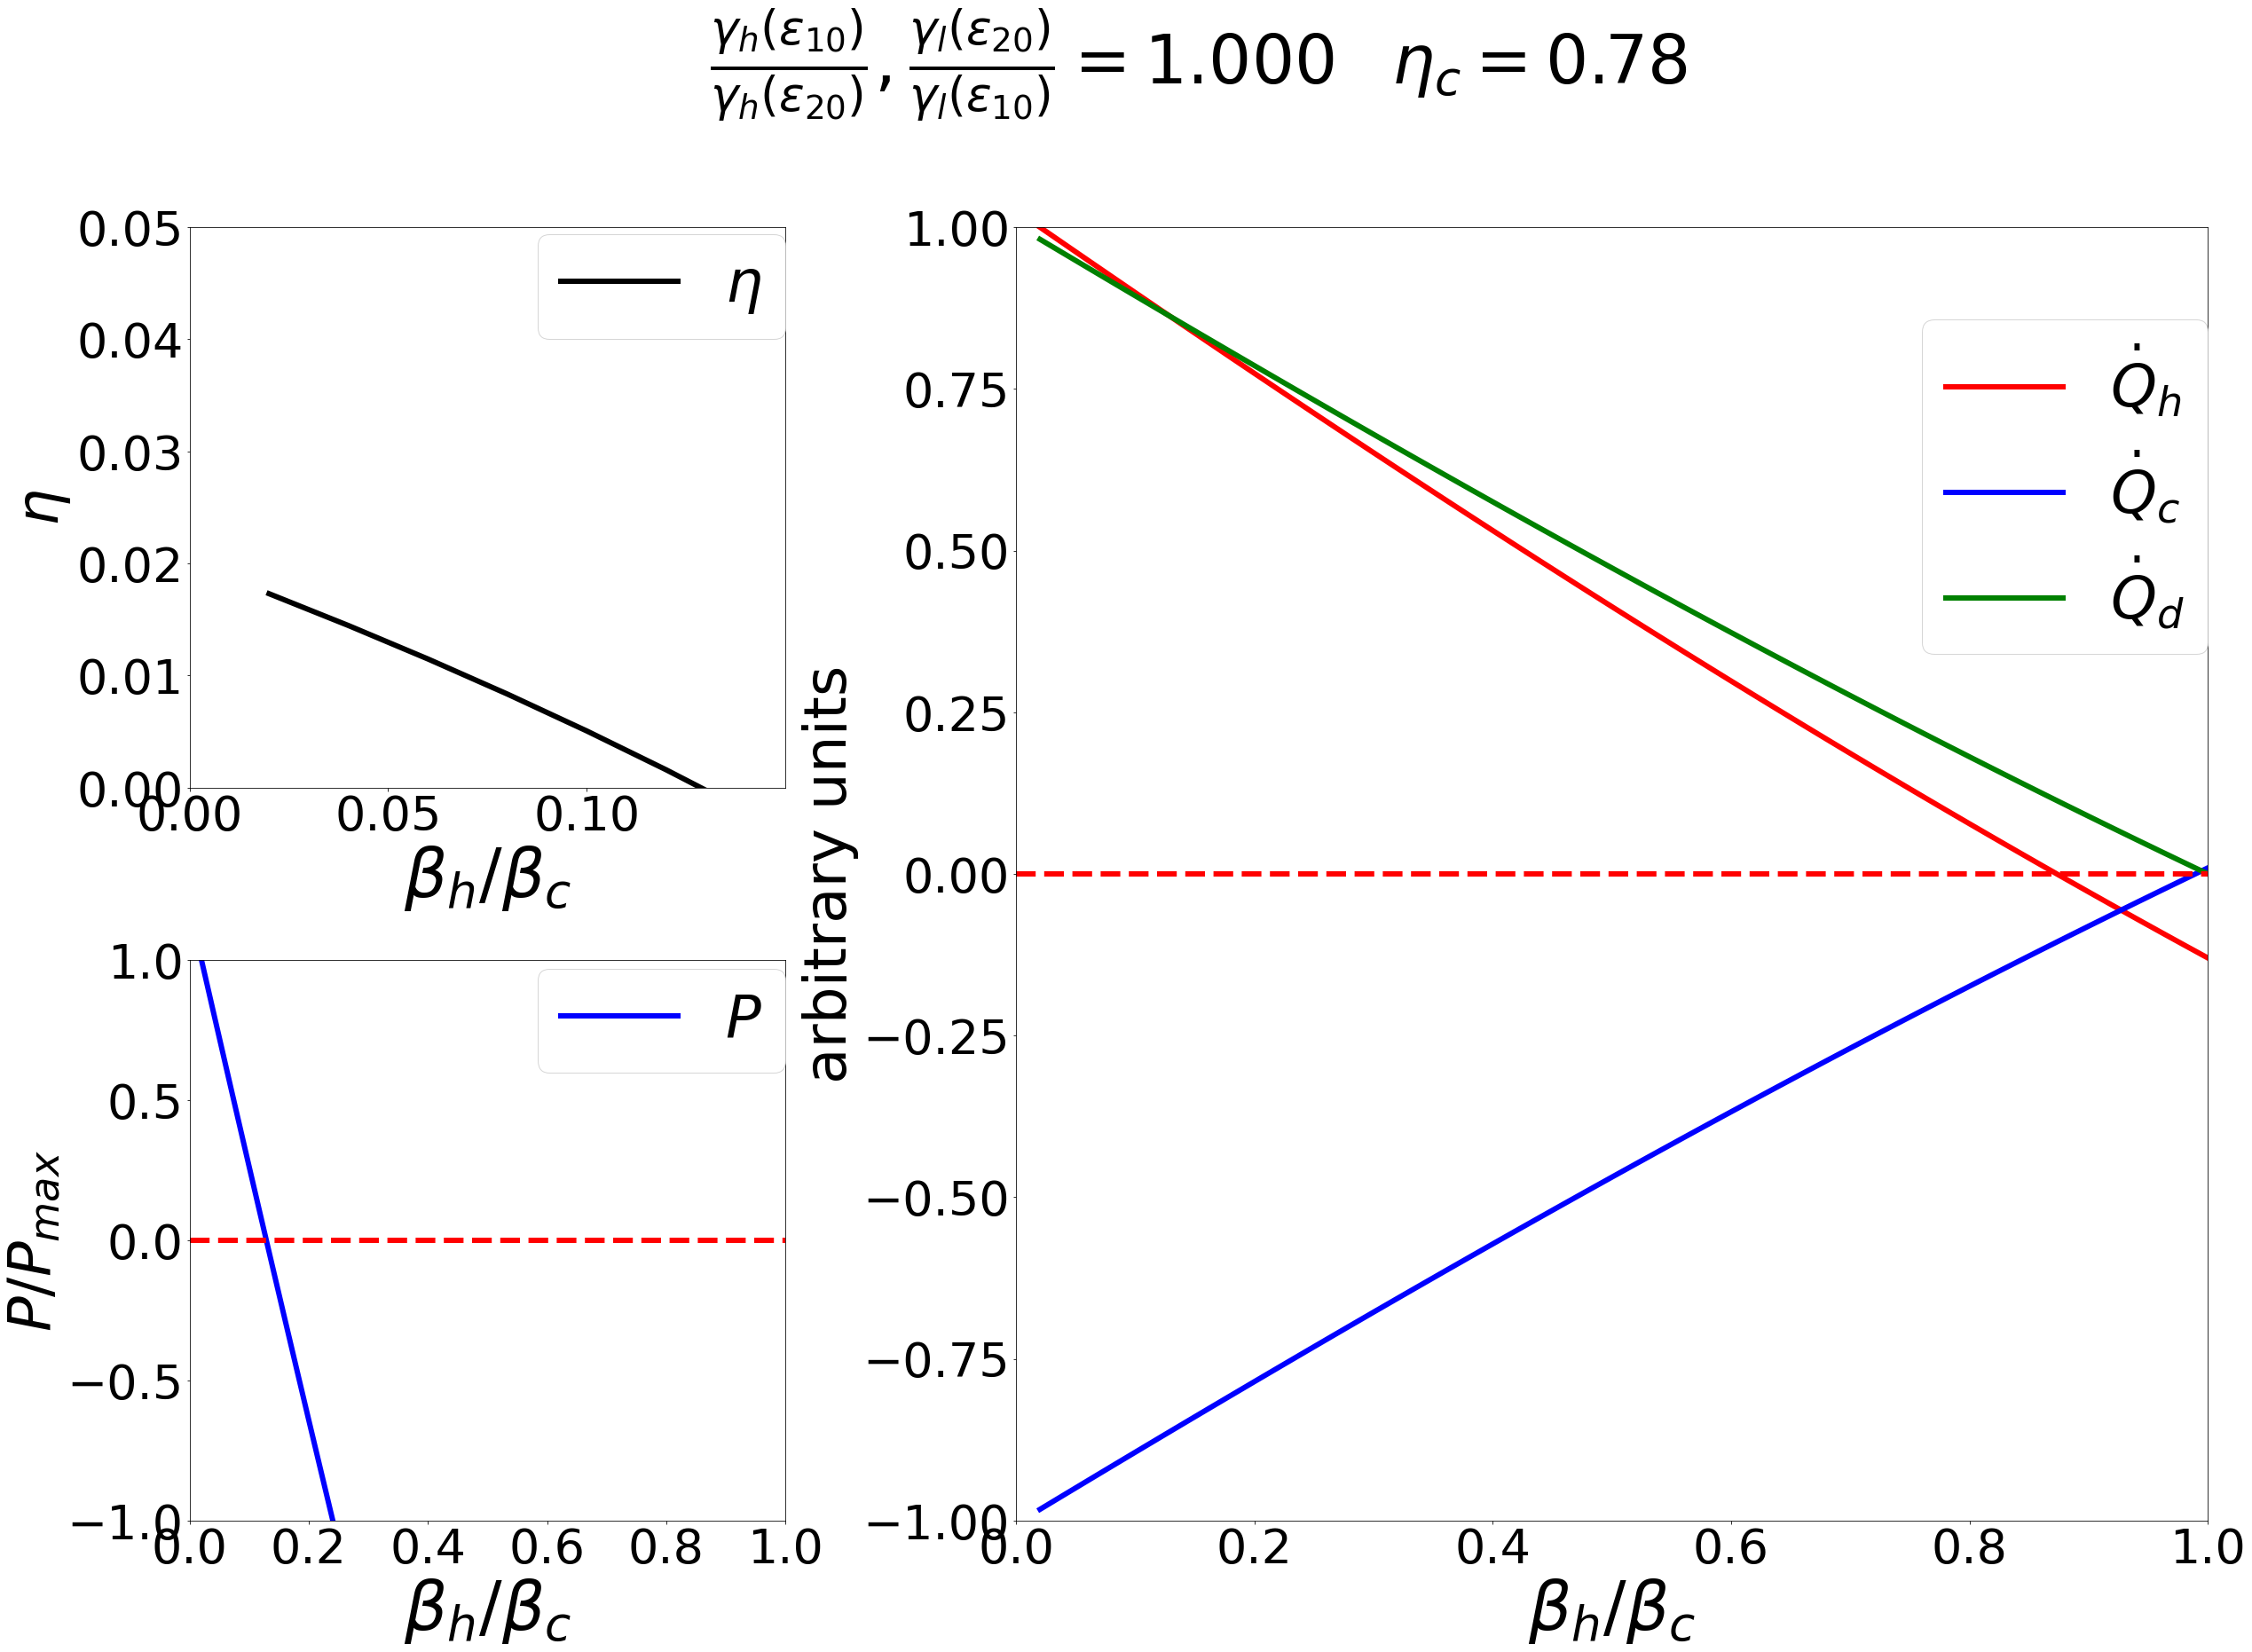

In [8]:
# TEMPERATURE DEPENDENCE

fig  = plt.figure(constrained_layout=True)
widths = [2, 4]
heights = [6, 6]
specs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                          height_ratios=heights)
wd = 6      
font = 66
font1 = 76
ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[:,1])
plt.style.use('seaborn-pastel')

        
ax1.set_xlabel(r'$\beta_h/\beta_c$', fontsize =font1)
ax1.set_ylabel(r'$\eta$',fontsize =font)
line1, = ax1.plot([],[],color='black',lw=wd)
ax1.axhline(y=1-var.b_h[39]/var.b_l, color='r', linestyle='--')
ax1.set_xlim(0,1)
ax1.set_ylim(-0,.05)
#ax1.set_xticks([0,0.2,0.4,0.6,0.8,1])

    
        
ax2.set_xlabel(r'$\beta_h/\beta_c$',fontsize =font1)
ax2.set_ylabel(r'$P/P_{max}$',fontsize =font)
line2, = ax2.plot([],[],color='blue',lw=wd)
#ax1.set_aspect('equal', 'datalim')
ax2.set_xlim(0,1)
ax2.set_ylim(-1,1)
ax2.axhline(0, color='r', linestyle='--',lw=wd)
ax2.set_xticks(np.arange(0,1,0.2))
#ax2.set_title(r'$\eta_c=%.2f$'%(1-var.b_h[39]/var.b_l))
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])

ax3.set_xlabel(r'$\beta_h/\beta_c$',fontsize =font1)
ax3.set_ylabel('arbitrary units',fontsize =font)
line3, = ax3.plot([],[],color='red',lw=wd)
line4, = ax3.plot([],[],color='blue',lw=wd)
line5, = ax3.plot([],[],color='green',lw=wd)
#ax1.set_aspect('equal', 'datalim')
ax3.set_xlim(0,1)
ax3.set_ylim(-1,1)
ax3.axhline(0, color='red', linestyle='--',lw=wd)
ax3.set_xticks(np.arange(0,1,0.2))
#ax3.set_title(r'$\eta_c=%.2f$'%(1-var.b_h[39]/var.b_l))
ax3.set_xticks([0,0.2,0.4,0.6,0.8,1])



def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line4.set_data([],[])
    line5.set_data([],[])
    
    return line1,


i = 100
x = var.b_h/var.b_l
var.g_h10 =  var.g_l10*(i/100)
var.g_l20 = var.g_h20*(i/100)
P   = POWER(var)
R   = np.array(R00(var))
P_0 = np.array(P0(var))
Q_d = R*P_0
Q_l = Ql(var,P,Q_d)
Q_h = Qh(var,P,Q_d)
n   = EFF(P,Q_h)

y1    = np.transpose(n)[:][39]  
y2    = np.transpose(P)[:][39]
y3    = np.transpose(Q_h)[:][39]
y4    = np.transpose(Q_l)[:][39]
y5    = np.transpose(Q_d)[:][39]

fig.text(0.5, 1.64,\
r'$\frac{\gamma_h(\epsilon_{10})}{\gamma_h(\epsilon_{20})},\frac{\gamma_l(\epsilon_{20})}{\gamma_l(\epsilon_{10})}=%.3f$'\
             %(i/100)\
               + r'$ \;\;\; \eta_c=%.2f$'%(1-var.b_h[39]/var.b_l), fontsize= font1)
idx = np.argwhere(np.diff( np.sign( y2 ))).flatten()
ax1.set_xlim(-0,x[idx[0]]+0.01)   
line1.set_data(x,y1)
line1.set_label(r'$\eta$')
line2.set_data(x,y2/max(y2))
line2.set_label(r'$P$')
line3.set_data(x,y3/max(y3))
line3.set_label(r'$\dot Q_h$')
line4.set_data(x,y4/max(y3))
line4.set_label(r'$\dot Q_c$')
line5.set_data(x,y5/max(y3))
line5.set_label(r'$\dot Q_d$')

ax1.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=font)
ax2.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=font)
ax3.legend(bbox_to_anchor=(1, .67), loc='lower right', borderaxespad=0, fontsize=font)
fig.tight_layout( rect=[0, 0, 1.6, 1.6])

#plt.tight_layout(pad= .1,h_pad= .00200,w_pad=.00)
plt.savefig(os.path.join(my_path1,'3level__uniform_beta.eps'))

y1


In [ ]:
#COMPACT VERSION
# TEMPERATURE DEPENDENCE

fig  = plt.figure(constrained_layout=True)
widths = [2, 4]
heights = [6, 6]
specs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                          height_ratios=heights)


ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[:,1])
plt.style.use('seaborn-pastel')

        
ax1.set_xlabel(r'$\beta_h/\beta_c$', fontsize =26)
ax1.set_ylabel(r'$\eta$',fontsize =26)
line1, = ax1.plot([],[],color='black',lw=2)
ax1.axhline(y=1-var.b_h[39]/var.b_l, color='r', linestyle='--')
ax1.set_xlim(0,1)
ax1.set_ylim(-0,.05)
ax1.set_xticks([0,0.2,0.4,0.6,0.8,1])

    
        
ax2.set_xlabel(r'$\beta_h/\beta_c$',fontsize =26)
ax2.set_ylabel(r'$P/P_{max}$',fontsize =26)
line2, = ax2.plot([],[],color='blue',lw=2)
#ax1.set_aspect('equal', 'datalim')
ax2.set_xlim(0,1)
ax2.set_ylim(-1,1)
ax2.axhline(0, color='r', linestyle='--')
ax2.set_xticks(np.arange(0,1,0.2))
#ax2.set_title(r'$\eta_c=%.2f$'%(1-var.b_h[39]/var.b_l))
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])

ax3.set_xlabel(r'$\beta_h/\beta_c$',fontsize =26)
ax3.set_ylabel('arbitrary units',fontsize =26)
line3, = ax3.plot([],[],color='red',lw=2)
line4, = ax3.plot([],[],color='blue',lw=2)
line5, = ax3.plot([],[],color='green',lw=2)
#ax1.set_aspect('equal', 'datalim')
ax3.set_xlim(0,1)
ax3.set_ylim(-1,1)
ax3.axhline(0, color='r', linestyle='--')
ax3.set_xticks(np.arange(0,1,0.2))
#ax3.set_title(r'$\eta_c=%.2f$'%(1-var.b_h[39]/var.b_l))
ax3.set_xticks([0,0.2,0.4,0.6,0.8,1])



def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line4.set_data([],[])
    line5.set_data([],[])
    
    return line1,


i = 100
x = var.b_h/var.b_l
var.g_h10 =  var.g_l10*(i/100)
var.g_l20 = var.g_h20*(i/100)
P   = POWER(var)
R   = np.array(R00(var))
P_0 = np.array(P0(var))
Q_d = R*P_0
Q_l = Ql(var,P,Q_d)
Q_h = Qh(var,P,Q_d)
n   = EFF(P,Q_h)

y1    = np.transpose(n)[:][39]  
y2    = np.transpose(P)[:][39]
y3    = np.transpose(Q_h)[:][39]
y4    = np.transpose(Q_l)[:][39]
y5    = np.transpose(Q_d)[:][39]

fig.suptitle(\
r'$\frac{\gamma_h(\epsilon_{10})}{\gamma_h(\epsilon_{20})},\frac{\gamma_l(\epsilon_{20})}{\gamma_l(\epsilon_{10})}=%.3f$'\
             %(i/100)\
               + r'$ \;\;\; \eta_c=%.2f$'%(1-var.b_h[39]/var.b_l), fontsize= 26)
   
line1.set_data(x,y1)
line1.set_label(r'$\eta$')
line2.set_data(x,y2/max(y2))
line2.set_label(r'$P$')
line3.set_data(x,y3/max(y3))
line3.set_label(r'$\dot Q_h$')
line4.set_data(x,y4/max(y3))
line4.set_label(r'$\dot Q_c$')
line5.set_data(x,y5/max(y3))
line5.set_label(r'$\dot Q_d$')

ax1.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=20)
ax2.legend(bbox_to_anchor=(1, .8), loc='lower right', borderaxespad=0, fontsize=20)
ax3.legend(bbox_to_anchor=(1, .67), loc='lower right', borderaxespad=0, fontsize=20)


#plt.tight_layout(pad= .1,h_pad= .00200,w_pad=.00)
#plt.savefig(os.path.join(my_path1,'3level__beta.eps'))





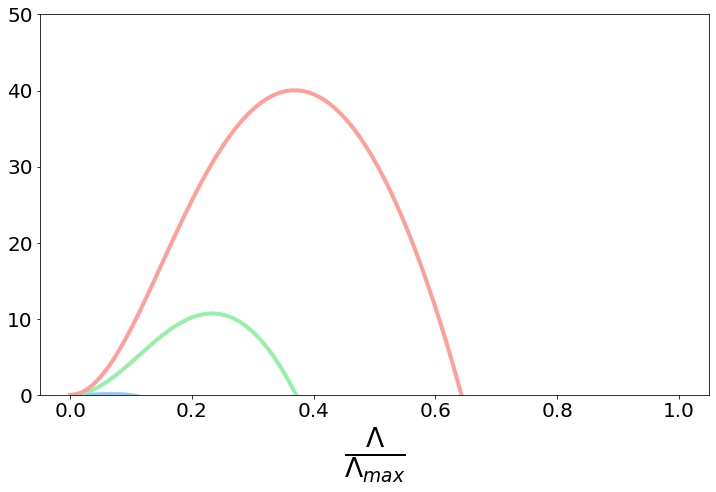

In [289]:
for i in range(20,50,10):
    plt.plot(var.lw/max(var.lw),P[i],linewidth=4)
    plt.xlabel(r'$\frac{\Lambda}{ \Lambda_{max}}$', fontsize =38)
    plt.ylim(-0,50)

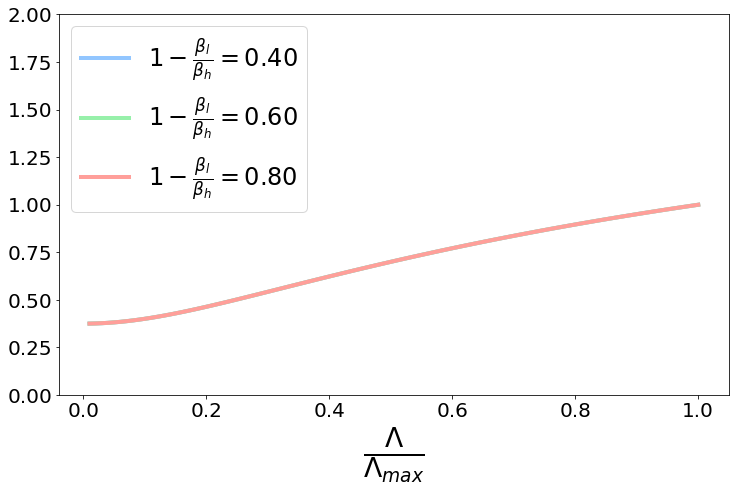

In [290]:
for i in range(20,50,10):
    plt.plot(var.lw/max(var.lw),n[i],linewidth=4,\
            label=r'$1- \frac{\beta_l}{\beta_h} = %.2f$'\
             %(1-var.b_h[i]/var.b_l) )
    plt.ylim(0,2)
    #plt.xlim(0,1)
    plt.xlabel(r'$\frac{\Lambda}{ \Lambda_{max}}$', fontsize =38)
    
    plt.legend(fontsize=24)

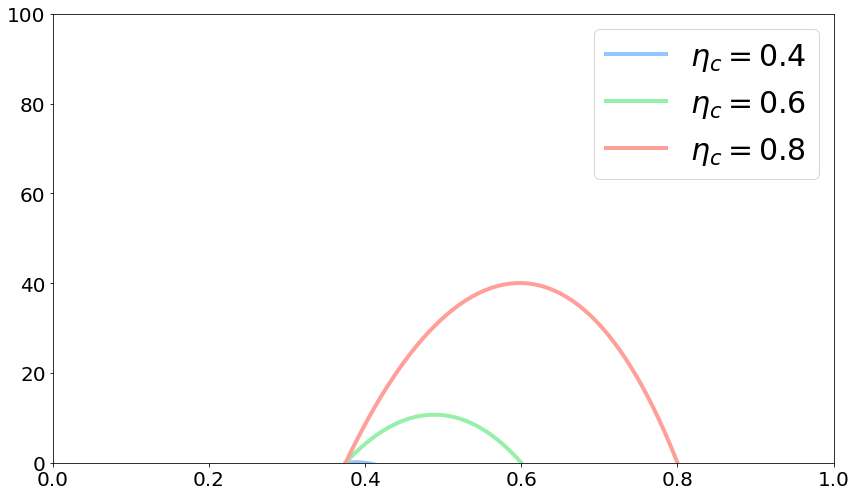

In [291]:

for i in range(20,50,10):
    plt.plot(n[i], P[i],label=r'$ \eta_c =%.1f$'%(var.n_c[i]),linewidth=4)
    plt.ylim(0,100)
    plt.xlim(0,1)
    plt.legend(fontsize=30)
    plt.tight_layout()

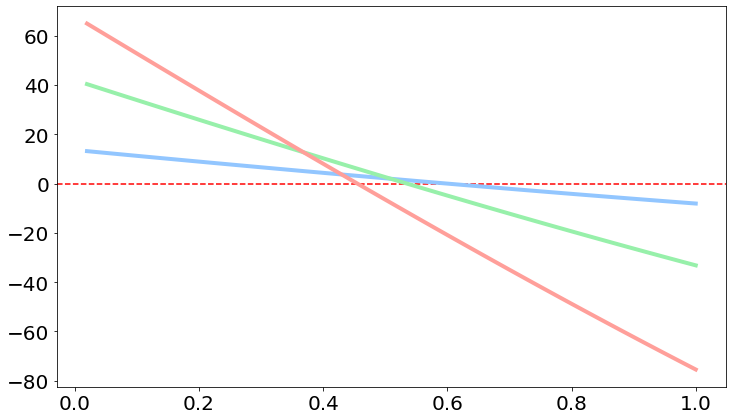

In [292]:
a =np.transpose(P)
b = np.transpose(Q_h)
c = np.transpose(Q_l)
d = np.transpose(Q_d)
e = np.transpose(n)
plt.axhline(y=0, color='r', linestyle='--')
for i in range(10,40,10):
    plt.plot(var.b_h/var.b_l,a[:][i], label= r'$\Lambda =%.1f$'%(var.lw[i]),linewidth=4)
    
   
    


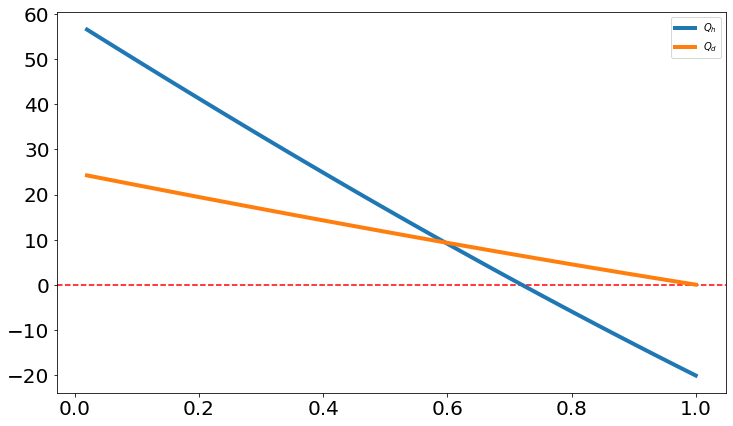

In [13]:
i =10
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(var.b_h/var.b_l,b[:][i], label= r'$Q_h $',linewidth=4)
plt.plot(var.b_h/var.b_l,d[:][i], label= r'$ Q_d$',linewidth=4)
plt.legend()


(0.0, 1.02)

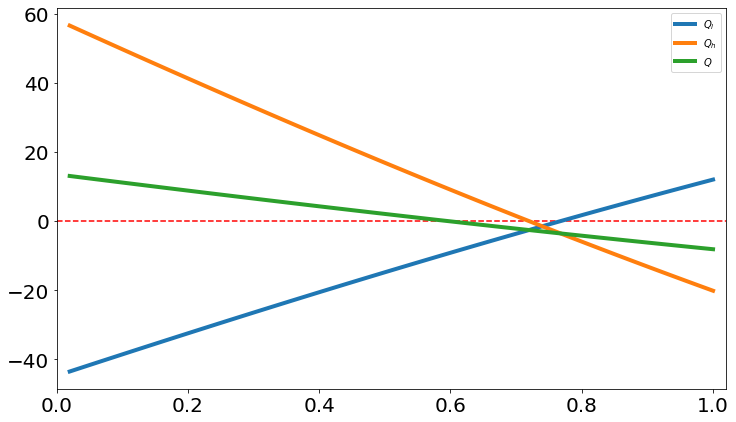

In [14]:
i =10
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(var.b_h/var.b_l,c[:][i], label= r'$Q_l $',linewidth=4)
#plt.plot(var.b_h/var.b_l,d[:][i], label= r'$ Q_d$',linewidth=4)
plt.plot(var.b_h/var.b_l,b[:][i], label= r'$Q_h $',linewidth=4)
plt.plot(var.b_h/var.b_l,c[:][i]+b[:][i], label= r'$ Q$',linewidth=4)
plt.legend()
plt.xlim(0.,1.02)



(0.0, 1.02)

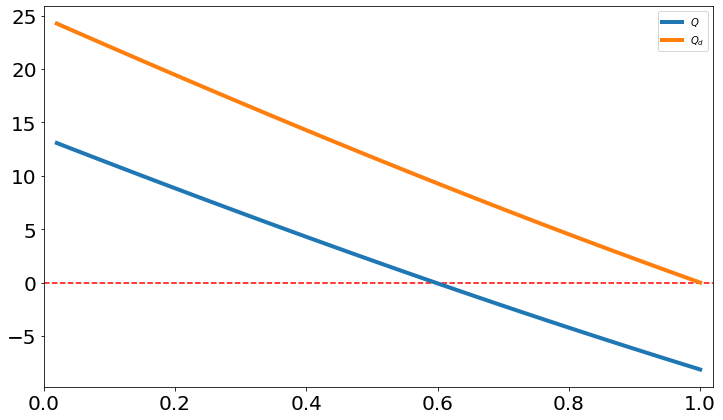

In [15]:
i =10
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(var.b_h/var.b_l,c[:][i]+b[:][i], label= r'$ Q$',linewidth=4)
plt.plot(var.b_h/var.b_l,d[:][i], label= r'$ Q_d$',linewidth=4)
plt.legend()
plt.xlim(0.,1.02)


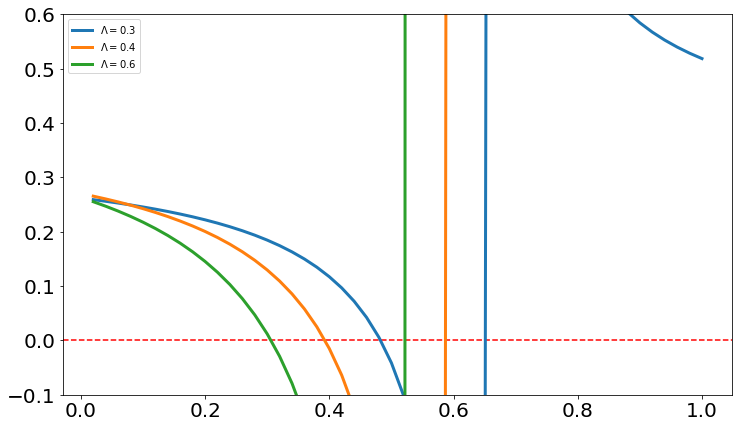

In [18]:
plt.axhline(y=0, color='r', linestyle='--')
for i in range(25,50,10):
    plt.plot(var.b_h/var.b_l,e[:][i], label= r'$\Lambda =%.1f$'%(var.lw[i]),linewidth=3)
    plt.ylim(-.1,.60)
    plt.legend()
    